# <span style="font-size:7vw;font-weight:800;text-shadow:2px 2px 15px #aaa">Eigen Face</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:5vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:5vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

## Import Libs

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load data if not at local it will fetch from internet

In [2]:
faces_data = fetch_olivetti_faces()

In [3]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
Y = faces_data.target
n_classes = max(Y)+1

print("""
Number of samples: {}, 
Height of each image: {},
Width of each image: {},
Number of input features: {},
Number of output classes: {}""".format(n_samples,height,
                                        width,n_features,n_classes))


Number of samples: 400, 
Height of each image: 64,
Width of each image: 64,
Number of input features: 4096,
Number of output classes: 40


### Splitting Data for Tesing And Training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1)

### Who is Avarage Human

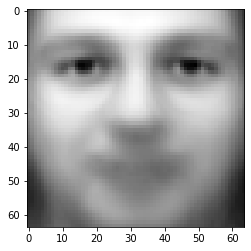

In [5]:
mean_image = np.mean(X_train,axis=0)
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)

#### Code For Plotting

In [6]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

### Sample Data 

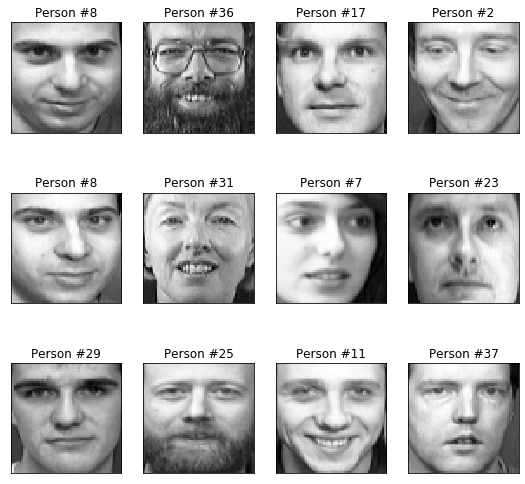

In [7]:
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]
plot_gallery(chosen_images, height, width, titles)

In [8]:
n_components = 150

## Use PCA For Dimension Reduction

In [9]:
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

In [10]:
eigenfaces = pca.components_.reshape((n_components, height, width))

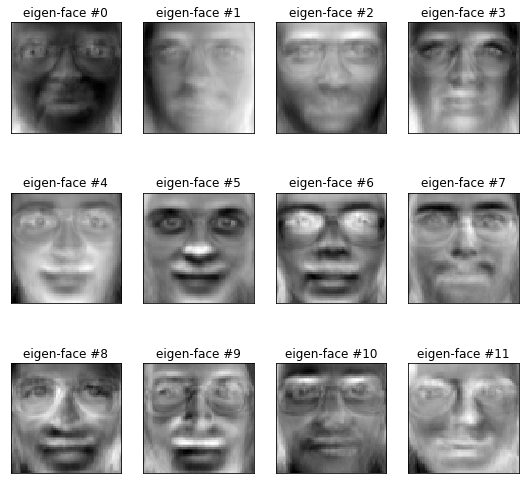

In [11]:
titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


# Clustring Data for Classification

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train_pca, y_train)

#Detect faces in the test set
y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy: 0.36
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         0
           4       0.25      1.00      0.40         1
           5       0.00      0.00      0.00         1
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      0.25      0.40         4
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17

## Prediction

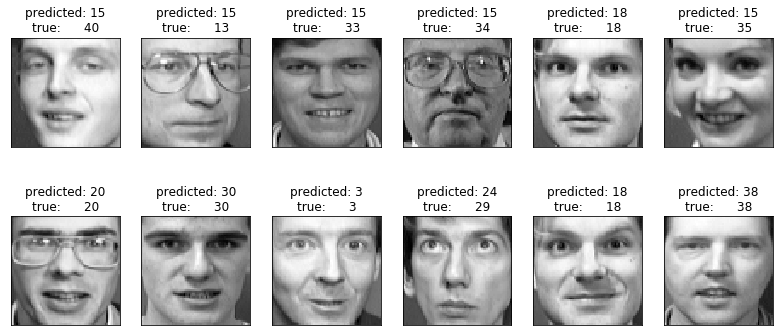

In [15]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test, y_test, target_names, i)
                     for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()